In [1]:
%autosave 60

Autosaving every 60 seconds


In [36]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-qiskit_optical_elements.ipynb
%run init-optical_elements.ipynb

In [3]:
%run init-qiskit.ipynb

C:\Users\stark\AppData\Local\Temp\ipykernel_14040\1918398002.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
ibmqfactory.load_account:WARNING:2023-04-26 07:51:00,256: Credentials are already in use. The existing account in the session will be replaced.


ibm_oslo                     ibm_perth                    ibm_nairobi
--------                     ---------                    -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 68             Pending Jobs: 186            Pending Jobs: 101
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      126.9          Avg. T1:      182.5          Avg. T1:      112.2
Avg. T2:      102.5          Avg. T2:      118.0          Avg. T2:      66.0



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 84             Pending Jobs: 111            Pending Jobs: 221
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True         

In [6]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Testes para matriz densidade 1

## Simulação no qiskit

In [66]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth)
ρb_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
ρb_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
ρb_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
ρb_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Irr_b_in               = np.zeros(th.shape[0])
Irr_b_out              = np.zeros(th.shape[0])
Irr_WZ_in              = np.zeros(th.shape[0])
Irr_WZ_out             = np.zeros(th.shape[0])
#
# Testes
#
ρ_ABCD             = np.zeros(th.shape[0], dtype=object)

In [67]:
j=0
#
# Circuito - Quantum Entangled Eraser
#
qr = qiskit.QuantumRegister(4); qc = qiskit.QuantumCircuit(qr)
#
# Circuito
#
qc.h(3)
qc.cx(3,2)
qc.x(1); qc.s(1)
qc.h(0); qc.s(0)
#
# Tomografia
#
qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]])
job = qiskit.execute(qstc, backend = simulator, shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
#
# rho
#
ρ_ABCD[j] = qstf.fit(method='lstsq')
print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01


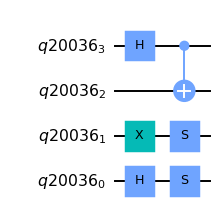

In [68]:
qc.draw(output = 'mpl', scale = 0.7, reverse_bits=True)

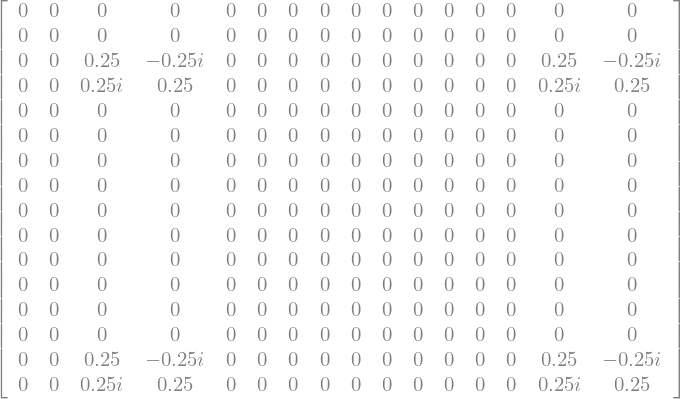

In [69]:
Matrix(ρ_ABCD[0]).applyfunc(lambda x: round(x, 2))

## Contas analíticas do mesmo problema

In [78]:
ψi_ABCD = pket('0000')
mysim(mbk(ψi_ABC))

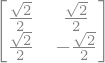

In [79]:
mysim(H)

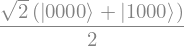

In [80]:
ψ1_ABCD = psi_gate(ψi_ABCD, H, 0)
mysim(mbk(ψ1_ABCD))

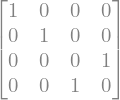

In [81]:
CNOT_ct

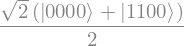

In [89]:
ψ2_ABCD = psi_ctrl(ψ1_ABCD, CNOT_ct, 0, 1)
mysim(mbk(ψ2_ABCD))

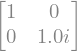

In [90]:
S

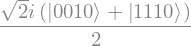

In [91]:
ψ3_ABCD = psi_gate(ψ2_ABCD, S*pauli(1), 2)
mysim(mbk(ψ3_ABCD))

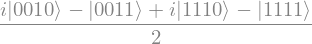

In [92]:
ψ4_ABCD = psi_gate(ψ3_ABCD, S*H, 3)
mysim(mbk(ψ4_ABCD))

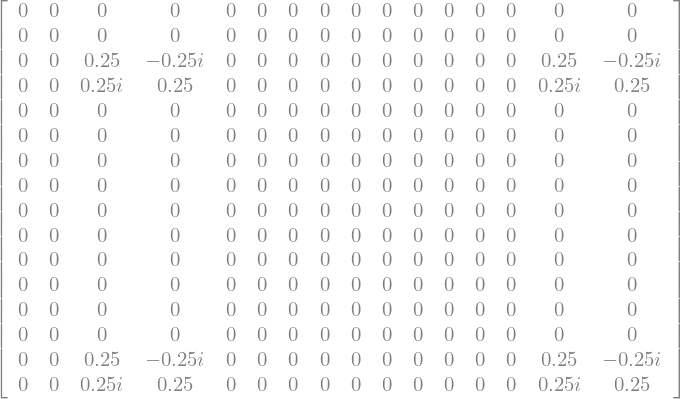

In [94]:
ρ4_ABCD = proj(ψ4_ABCD)
ρ4_ABCD

## Simulação no qiskit - trocando a ordem da tomografia

In [105]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); dth = th.shape[0]
ρb_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
ρb_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
ρb_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
ρb_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Irr_b_in               = np.zeros(th.shape[0])
Irr_b_out              = np.zeros(th.shape[0])
Irr_WZ_in              = np.zeros(th.shape[0])
Irr_WZ_out             = np.zeros(th.shape[0])
#
# Testes
ρ_ABCD             = np.zeros(th.shape[0], dtype=object)
ρ_DCBA             = np.zeros(th.shape[0], dtype=object)

In [106]:
j=0
#
# Circuito - Quantum Entangled Eraser
#
qr = qiskit.QuantumRegister(4); qc = qiskit.QuantumCircuit(qr)
#
# Circuito
#
qc.h(3)
qc.cx(3,2)
qc.x(1); qc.s(1)
qc.h(0); qc.s(0)
#
# Tomografia
#
qstc = state_tomography_circuits(qc, [qr[3],qr[2],qr[1],qr[0]])
job = qiskit.execute(qstc, backend = simulator, shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
#
# rho
#
ρ_DCBA[j] = qstf.fit(method='lstsq')
print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01


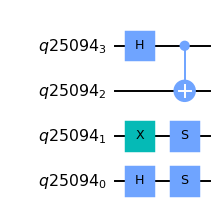

In [107]:
qc.draw(output = 'mpl', scale = 0.7, reverse_bits=True)

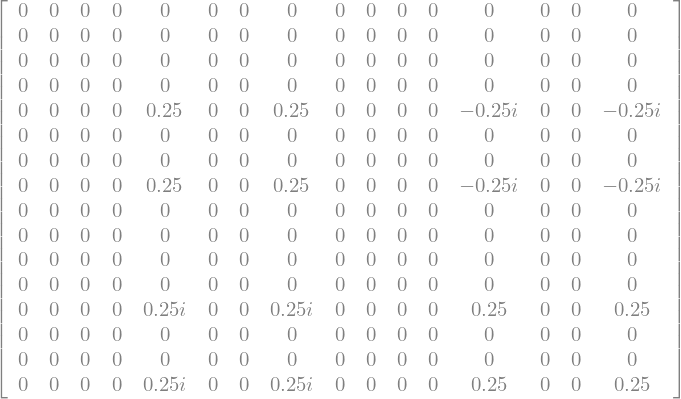

In [108]:
Matrix(ρ_DCBA[0]).applyfunc(lambda x: round(x, 2))

## Contas analíticas do mesmo problema

In [78]:
ψi_ABCD = pket('0000')
mysim(mbk(ψi_ABC))

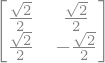

In [79]:
mysim(H)

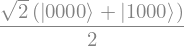

In [80]:
ψ1_ABCD = psi_gate(ψi_ABCD, H, 0)
mysim(mbk(ψ1_ABCD))

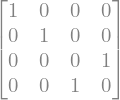

In [81]:
CNOT_ct

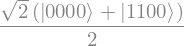

In [89]:
ψ2_ABCD = psi_ctrl(ψ1_ABCD, CNOT_ct, 0, 1)
mysim(mbk(ψ2_ABCD))

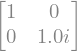

In [90]:
S

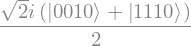

In [91]:
ψ3_ABCD = psi_gate(ψ2_ABCD, S*pauli(1), 2)
mysim(mbk(ψ3_ABCD))

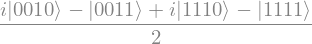

In [92]:
ψ4_ABCD = psi_gate(ψ3_ABCD, S*H, 3)
mysim(mbk(ψ4_ABCD))

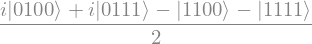

In [100]:
ψ4_BCDA = troca_qubit(ψ4_ABCD, 0, 3)
ψ4_CDBA = troca_qubit(ψ4_BCDA, 0, 2)
ψ4_DCBA = troca_qubit(ψ4_CDBA, 0, 1)
mysim(mbk(ψ4_DCBA))

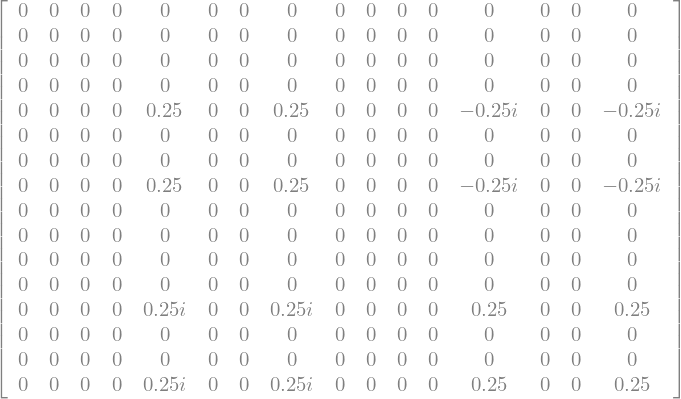

In [102]:
ρ4_DCBA = proj(ψ4_DCBA)
ρ4_DCBA

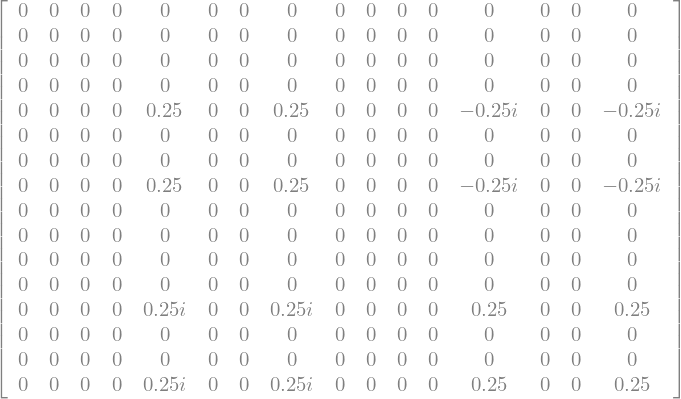

In [108]:
Matrix(ρ_DCBA[0]).applyfunc(lambda x: round(x, 2))

# Testes para matriz densidade 2

## Simulação no qiskit

In [109]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); dth = th.shape[0]
ρb_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
ρb_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
ρb_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
ρb_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Irr_b_in               = np.zeros(th.shape[0])
Irr_b_out              = np.zeros(th.shape[0])
Irr_WZ_in              = np.zeros(th.shape[0])
Irr_WZ_out             = np.zeros(th.shape[0])
#
# Testes
ρ_ABCD             = np.zeros(th.shape[0], dtype=object)

In [110]:
j=0
#
# Circuito - Quantum Entangled Eraser
#
qr = qiskit.QuantumRegister(4); qc = qiskit.QuantumCircuit(qr)
#
# Circuito
#
qc.h(0)
qc.cx(0,1)
qc.x(2); qc.s(2)
qc.h(3); qc.s(3)
#
# Tomografia
#
qstc = state_tomography_circuits(qc, [qr[3],qr[2],qr[1],qr[0]])
job = qiskit.execute(qstc, backend = simulator, shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc)
#
# rho
#
ρ_ABCD[j] = qstf.fit(method='lstsq')
print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01


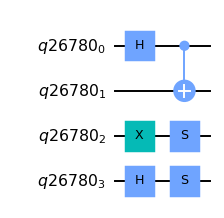

In [112]:
qc.draw(output = 'mpl', scale = 0.7)

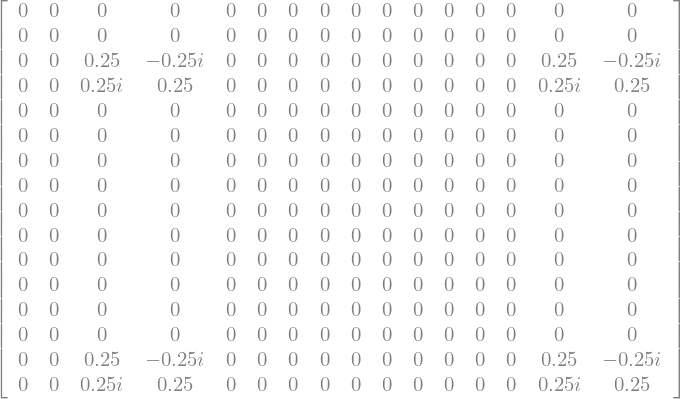

In [113]:
Matrix(ρ_ABCD[0]).applyfunc(lambda x: round(x, 2))

# Contas analíticas do mesmo problema

In [78]:
ψi_ABCD = pket('0000')
mysim(mbk(ψi_ABC))

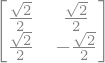

In [79]:
mysim(H)

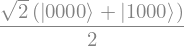

In [80]:
ψ1_ABCD = psi_gate(ψi_ABCD, H, 0)
mysim(mbk(ψ1_ABCD))

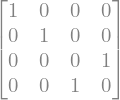

In [81]:
CNOT_ct

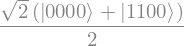

In [89]:
ψ2_ABCD = psi_ctrl(ψ1_ABCD, CNOT_ct, 0, 1)
mysim(mbk(ψ2_ABCD))

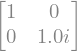

In [90]:
S

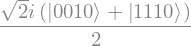

In [91]:
ψ3_ABCD = psi_gate(ψ2_ABCD, S*pauli(1), 2)
mysim(mbk(ψ3_ABCD))

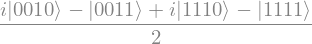

In [92]:
ψ4_ABCD = psi_gate(ψ3_ABCD, S*H, 3)
mysim(mbk(ψ4_ABCD))

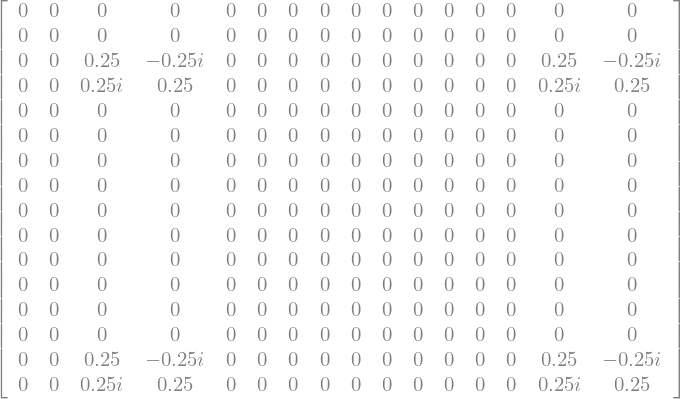

In [94]:
ρ4_ABCD = proj(ψ4_ABCD)
ρ4_ABCD